In [1]:
# Script to generate plots for ssd mobility performance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd 
from scipy import signal
import textwrap
from scipy.signal import butter, lfilter
import math
import imutils
import os
import glob
%matplotlib inline

In [2]:
folder_path = r'E:\data\test_results\P9\Session_preprocessed'
results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")

# Sort the index to get the correct trial index
results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
results = results.sort_index(ascending=True)
results = results.iloc[0:25,:]

# Inport random sheet to get trial info 
random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
results = pd.concat([random, results], axis=1)
results

,trial_num,device,mode,location,devicemode,Response_time,Contact_time,Average_velocity,Max_velocity,Margin_stability,...,lmmal,lmt5,lmt23,lmt1,rheel,rlmal,rmmal,rmt5,rmt23,rmt1
1,LOCATE 1,Cane,None,4,Cane None,0.000000,12.633333,0.289228,0.524922,196.289259,...,"[[-1823.583984375, 1381.7215576172, 91.3342514...","[[-1736.1787109375, 1518.1801757812, 28.171394...","[[-1694.3220214844, 1489.5217285156, 37.262668...","[[-1669.4102783203, 1438.0439453125, 33.504581...","[[-1937.8479003906, 1118.6102294922, 38.978893...","[[-1912.8262939453, 1048.0952148438, 78.724304...","[[-1852.4177246094, 1119.3582763672, 102.94646...","[[-1793.2996826172, 985.6690063477, 31.4332466...","[[-1748.8132324219, 1010.3812255859, 44.290931...","[[-1729.6882324219, 1062.9145507812, 47.925476..."
2,LOCATE 2,MiniGuide,Depth,1,MiniGuideDepth,3.066666,9.700000,0.195657,0.468836,184.717875,...,"[[-1756.5307617188, 1269.4261474609, 93.665428...","[[-1645.0454101562, 1384.4006347656, 27.028171...","[[-1609.2921142578, 1346.0977783203, 38.610885...","[[-1595.3020019531, 1290.259765625, 35.7844161...","[[-1896.2458496094, 1050.9451904297, 41.182399...","[[-1873.0157470703, 979.8853149414, 79.9193649...","[[-1811.0598144531, 1049.1998291016, 104.50516...","[[-1756.4194335938, 912.0510253906, 30.8673477...","[[-1710.1429443359, 936.0280151367, 42.7886619...","[[-1689.1658935547, 989.3305664062, 45.4532318..."
3,LOCATE 3,Cane,None,2,Cane None,3.925000,5.191667,0.250758,0.540886,268.651376,...,"[[-1762.7562255859, 1338.6636962891, 90.777633...","[[-1688.0123291016, 1482.9001464844, 27.443740...","[[-1644.1613769531, 1458.0754394531, 37.395885...","[[-1615.0793457031, 1408.5943603516, 34.749282...","[[-1849.7716064453, 1048.7487792969, 41.111003...","[[-1813.2498779297, 982.3746948242, 80.3639221...","[[-1763.8078613281, 1062.4200439453, 102.93670...","[[-1688.5310058594, 936.309753418, 32.07404327...","[[-1647.5642089844, 966.8352050781, 43.2485198...","[[-1635.6813964844, 1021.8666992188, 45.234027..."
4,LOCATE 4,vOICe,Depth,2,vOICeDepth,4.741666,7.758333,0.181316,0.453890,111.868732,...,"[[-1759.900390625, 1282.3254394531, 92.1365737...","[[-1677.2797851562, 1420.6749267578, 26.494924...","[[-1634.6655273438, 1392.3950195312, 37.575073...","[[-1608.6343994141, 1341.5472412109, 35.672847...","[[-1859.9149169922, 990.7744750977, 41.4956893...","[[-1830.2469482422, 924.0700683594, 80.8692169...","[[-1773.9555664062, 998.7626342773, 103.576377...","[[-1703.6284179688, 871.2047119141, 29.7018280...","[[-1662.0650634766, 900.6342773438, 43.1321525...","[[-1648.5668945312, 955.9411010742, 46.2732353..."
5,LOCATE 5,vOICe,Intensity,4,vOICeIntensity,16.241667,19.566667,0.161601,0.491423,115.375776,...,"[[-1858.9437255859, 1256.1624755859, 91.527572...","[[-1796.6745605469, 1406.5153808594, 27.122634...","[[-1750.6441650391, 1384.2346191406, 37.455059...","[[-1717.5784912109, 1337.8774414062, 34.953983...","[[-1944.1791992188, 947.6664428711, 42.2062225...","[[-1918.9124755859, 878.8436889648, 82.2468261...","[[-1858.4526367188, 951.2114868164, 102.371322...","[[-1802.6831054688, 811.0930786133, 32.2869338...","[[-1756.1990966797, 835.4403686523, 42.1887512...","[[-1735.8167724609, 888.4965820312, 44.0169677..."
6,LOCATE 6,vOICe,Intensity,1,vOICeIntensity,4.691666,8.300000,0.177737,0.624474,120.365551,...,"[[-1853.1187744141, 1339.6859130859, 91.642951...","[[-1760.8232421875, 1471.4017333984, 27.496410...","[[-1720.9791259766, 1440.7635498047, 37.501705...","[[-1698.8507080078, 1387.240234375, 34.8613166...","[[-1991.9022216797, 1045.1639404297, 41.051570...","[[-1967.7049560547, 975.9077148438, 80.3532562...","[[-1906.5236816406, 1045.9763183594, 103.65697...","[[-1846.8920898438, 912.2016601562, 30.5707893...","[[-1802.0139160156, 938.1176147461, 43.0888557...","[[-1784.0375976562, 992.194152832, 46.57101821..."
7,LOCATE 7,MiniGuide,Depth,5,MiniGuideDepth,10.175000,16.558333,0.191025,0.563009,233.023688,...,"[[-1857.9519042969, 1279.2895507812, 91.624671...","[[-1762.78

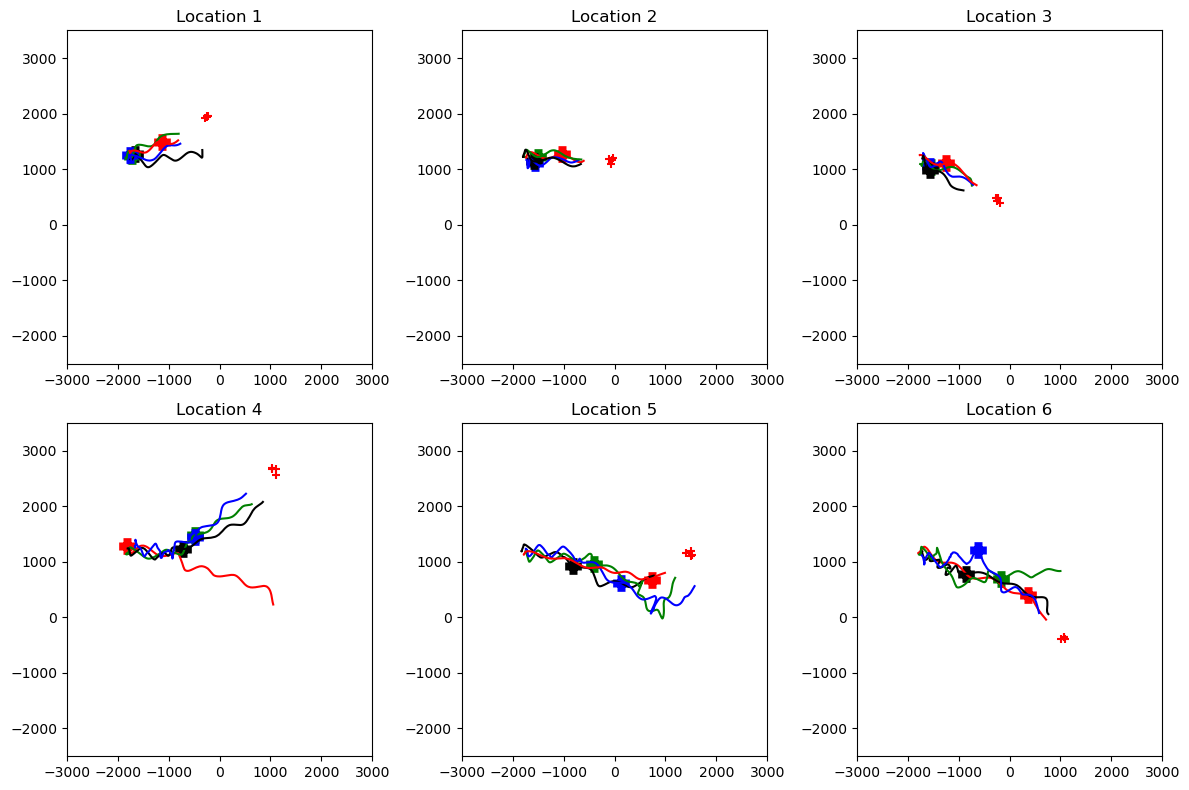

In [4]:
# Plot a main plot with different obstacle location and different conditions 

# Plot the interersted location and position
fig, axs = plt.subplots(2,3,figsize=(12,8))
axs[0, 0].set_title('Location 1')
axs[0, 1].set_title('Location 2')
axs[0, 2].set_title('Location 3')
axs[1, 0].set_title('Location 4')
axs[1, 1].set_title('Location 5')
axs[1, 2].set_title('Location 6')

# Set x and y limits for every subplot
x_limit = (-3000, 3000)
y_limit = (-2500, 3500)

for ax in axs.flat:
    ax.set_xlim(x_limit)
    ax.set_ylim(y_limit)
    
# Loop through the results and plot to cooresponding 
for index in range (1,25):
    
    location  = results.location[index]
    if results.devicemode[index] == 'vOICeDepth':
        c = 'blue'
    elif results.devicemode[index] == 'vOICeIntensity':
        c = 'green'
    elif results.devicemode[index] == 'MiniGuideDepth':
        c = 'black'
    elif results.devicemode[index] == 'Cane None':
        c = 'red'
    
    # Selecting a specific subplot by location
    subplot_number = location
    selected_subplot = axs[(subplot_number - 1) // 3, (subplot_number - 1) % 3]
    x_position = [sublist[0] for sublist in results.COFM[index]]
    y_position = [sublist[1] for sublist in results.COFM[index]]
    selected_subplot.plot(x_position,y_position,color = c)
    selected_subplot.scatter(results.CYL_center[index][100][0],results.CYL_center[index][100][1],marker='+',c = 'r')

    # Plot a marker when participant press the button
    selected_subplot.scatter(x_position[int(results.Response_time[index]*120)],\
                                         y_position[int(results.Response_time[index]*120)],marker='+',c = c,linewidths=12)
    
plt.tight_layout()    




In [7]:
folder_path = r'E:\data\test_results\P9\Session_preprocessed'
results = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")

# Sort the index to get the correct trial index
results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
results = results.sort_index(ascending=True)
results = results.iloc[0:19,:]

# Inport random sheet to get trial info 
random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
results = pd.concat([random, results], axis=1)
results

,trial_num,device_type,mode,location,location_num,Passing_time,Average_velocity,Max_velocity,Hesitation_number,Travel_distance,...,lmmal,lmt5,lmt23,lmt1,rheel,rlmal,rmmal,rmt5,rmt23,rmt1
1,AVOID 1,MiniGuide,Depth,C,3,15.108333,0.419137,0.803276,1,6.379001,...,"[[-2828.5954589844, 1154.2547607422, 100.62528...","[[-2763.9538574219, 1294.7653808594, 30.468772...","[[-2719.3161621094, 1272.7451171875, 43.149501...","[[-2688.1877441406, 1224.8249511719, 41.638912...","[[-2886.9489746094, 959.0895385742, 45.0836257...","[[-2827.7424316406, 905.5698242188, 82.6194915...","[[-2811.4501953125, 997.1340332031, 110.149635...","[[-2699.6169433594, 902.0905761719, 39.3568191...","[[-2669.4221191406, 943.3727416992, 50.4827461...","[[-2672.2995605469, 996.749206543, 47.73648834..."
2,AVOID 2,Cane,None,A,1,9.941667,0.621647,0.919890,0,6.214996,...,"[[-2720.0083007812, 1317.7786865234, 96.733161...","[[-2608.4694824219, 1423.5451660156, 27.142465...","[[-2579.876953125, 1388.0766601562, 44.8416557...","[[-2570.8310546875, 1334.5814208984, 47.653335...","[[-2852.234375, 1106.0871582031, 43.5102920532...","[[-2827.2705078125, 1032.0688476562, 81.722610...","[[-2767.12109375, 1103.1380615234, 107.2767410...","[[-2719.4887695312, 960.2261352539, 37.5481758...","[[-2670.7387695312, 980.9396972656, 45.9447517...","[[-2644.6501464844, 1030.6330566406, 45.027622..."
3,AVOID 3,Cane,None,B,2,9.325000,0.633944,0.909911,0,5.954998,...,"[[-2742.7456054688, 1262.1578369141, 96.152481...","[[-2655.6801757812, 1396.5135498047, 29.792661...","[[-2614.4916992188, 1367.0150146484, 41.155094...","[[-2590.9045410156, 1314.6130371094, 40.641479...","[[-2856.9331054688, 1012.1809692383, 46.133548...","[[-2819.5095214844, 946.4536132812, 84.0224761...","[[-2771.2124023438, 1026.6376953125, 108.38339...","[[-2690.275390625, 905.5504760742, 35.11408996...","[[-2648.9548339844, 939.4170532227, 46.4873771...","[[-2641.0319824219, 994.2957763672, 49.1771545..."
4,AVOID 4,MiniGuide,Depth,A,1,15.158333,0.459551,0.753027,1,6.996257,...,"[[-2726.6359863281, 1299.212890625, 95.6537094...","[[-2628.3986816406, 1425.2653808594, 29.798889...","[[-2591.1923828125, 1393.9223632812, 42.710849...","[[-2570.4440917969, 1340.037109375, 40.7054595...","[[-2856.6716308594, 1052.5554199219, 44.509998...","[[-2830.6616210938, 981.8729248047, 83.4367141...","[[-2771.6218261719, 1054.1752929688, 107.64376...","[[-2713.5849609375, 916.8087158203, 36.6380233...","[[-2668.7297363281, 942.4889526367, 48.1770362...","[[-2648.1145019531, 993.5150756836, 47.9683380..."
5,AVOID 5,vOICe,Depth,B,2,15.091667,0.427022,0.759733,0,6.480761,...,"[[-2947.7727050781, 1131.423828125, 100.729225...","[[-2869.2316894531, 1267.6567382812, 30.544950...","[[-2825.8076171875, 1239.9116210938, 40.673484...","[[-2799.3999023438, 1188.6237792969, 39.243873...","[[-2990.4772949219, 934.9618530273, 48.7965545...","[[-2952.98828125, 868.4939575195, 86.906532287...","[[-2904.0959472656, 949.3602905273, 109.304138...","[[-2829.9782714844, 820.9166259766, 38.0851097...","[[-2787.0236816406, 851.5967407227, 47.0607490...","[[-2773.9755859375, 906.6803588867, 47.9172172..."
6,AVOID 6,MiniGuide,Depth,C,3,14.825000,0.454905,0.758596,1,6.777842,...,"[[-2893.2827148438, 1229.3115234375, 97.729927...","[[-2792.8842773438, 1352.0043945312, 28.891313...","[[-2755.1655273438, 1317.9543457031, 40.458583...","[[-2737.1540527344, 1263.0816650391, 39.735755...","[[-2949.2729492188, 1010.6324462891, 46.325340...","[[-2909.294921875, 945.68359375, 85.1287612915...","[[-2865.3515625, 1029.4075927734, 108.14620971...","[[-2784.7082519531, 902.5663452148, 38.0608634...","[[-2742.4658203125, 934.6164550781, 45.7623786...","[[-2730.5505371094, 989.5292358398, 46.0033645..."
7,AVOID 7,vOICe,Depth,A,1,15.925000,0.465894,0.740297,0,7.437599,...,"[[-2763.5046386719, 1299.1228027344, 95.951728...","[[-2670.6218261719, 1423.5185546875, 30.299489...","[[-2631.9401855469, 1391.2513427734, 41.285266...","[[-2612.1396484375, 1337.34375, 39.6825561523].

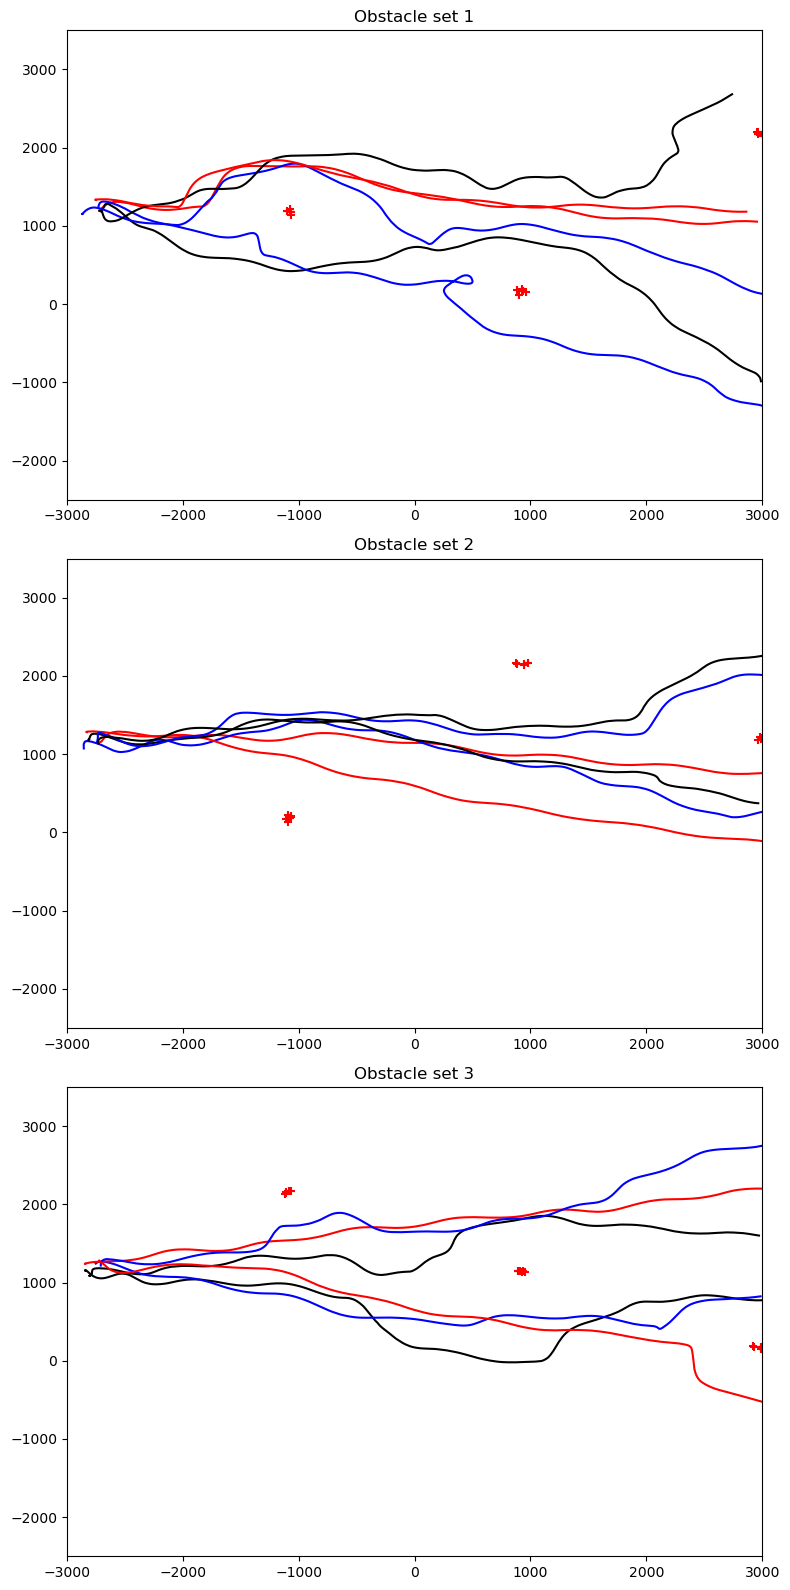

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
%matplotlib inline

# Plot a main plot with different obstacle location and different conditions 

# Plot the interersted location and position
fig, axs = plt.subplots(3,1,figsize=(8,16))
axs[0].set_title('Obstacle set 1')
axs[1].set_title('Obstacle set 2')
axs[2].set_title('Obstacle set 3')

# Set x and y limits for every subplot
x_limit = (-3000, 3000)
y_limit = (-2500, 3500)

for ax in axs.flat:
    ax.set_xlim(x_limit)
    ax.set_ylim(y_limit)
    
# Loop through the results and plot to cooresponding 
for index in range (1,19):
    
    obstacle_set  = results.location_num[index]
    if results.device_type[index] == 'vOICe':
        c = 'blue'
    elif results.device_type[index] == 'MiniGuide':
        c = 'black'
    elif results.device_type[index] == 'Cane':
        c = 'red'
    
    # Selecting a specific subplot by location
    subplot_number = obstacle_set
    selected_subplot = axs[subplot_number-1]
    selected_subplot.plot([sublist[0] for sublist in results.COFM[index]],[sublist[1] for sublist in results.COFM[index]],color = c)
    selected_subplot.scatter(results.CYL_center[index][1][0],results.CYL_center[index][1][1],marker='+',c = 'r')
    selected_subplot.scatter(results.small_square[index][1][0],results.small_square[index][1][1],marker='+',c = 'r')
    selected_subplot.scatter(results.large_square[index][1][0],results.large_square[index][1][1],marker='+',c = 'r')
    
plt.tight_layout()    


In [55]:
# Setting participants profile
Participants_list = ['P1','P2','P3','P5','P7']
barWidth = 0.15
locate_xtick = ['Cane','MiniGuide','vOICe-Depth','vOICe-Intensity']
avoid_xtick = ['Cane','MiniGuide','vOICe-Depth']
br1 = np.arange(len(locate_xtick))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br_list = [br1, br2, br3, br4, br5]
c_list = ['blue','red','green','yellow','black']
x_tick_loc_locate = np.sum(br_list,axis=0)/len(Participants_list)
x_tick_loc_avoid = np.sum([item[0:3] for item in br_list],axis=0)/len(Participants_list)

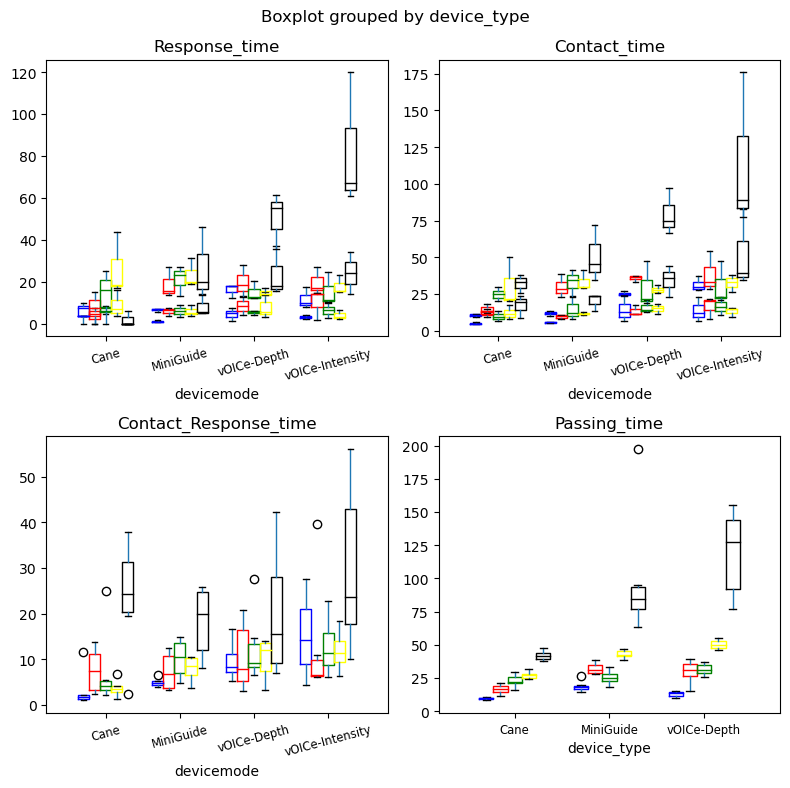

In [42]:
# Effciency plots 

fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].set_title('Response time')
axs[0,1].set_title('Contact time')
axs[1,0].set_title('Contact-Response time')
axs[1,1].set_title('Passing time')

# Modify the xtick font size for every subplot
xtick_font_size = 'small'

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=xtick_font_size)

for Participants_id in Participants_list:
    
    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = results.sort_index(ascending=True)
    random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
    random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = pd.concat([random, results], axis=1)
    results['Contact_Response_time'] = results.Contact_time - results.Response_time
   
    results_avoid = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")
    results_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = results_avoid.sort_index(ascending=True)
    random_avoid = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
    random_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = pd.concat([random_avoid, results_avoid], axis=1)
    
    # Set position of bar on X axis
    Participants_id_index = Participants_list.index(Participants_id)
    c = c_list[Participants_id_index]
    position = br_list[Participants_id_index]
        
    # how to customize the display different elements:
    boxprops = dict(linestyle='-', linewidth=1, color=c)
    medianprops = dict(linestyle='-', linewidth=1, color=c)
    
    # Split response and contact time in near and far distance 
    results_near = results.loc[results['location'] <= 3]
    results_far = results.loc[results['location'] > 3]
    
    results_near.boxplot(column=['Response_time'],by='devicemode', positions=position, ax = axs[0,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results_far.boxplot(column=['Response_time'],by='devicemode', positions=position, ax = axs[0,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results_near.boxplot(column=['Contact_time'],by='devicemode', positions=position,ax = axs[0,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)  
    results_far.boxplot(column=['Contact_time'],by='devicemode', positions=position,ax = axs[0,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)
    
    results.boxplot(column=['Contact_Response_time'],by='devicemode', positions=position, ax = axs[1,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)   
    results_avoid.boxplot(column=['Passing_time'],by='device_type', positions=position[0:3], ax = axs[1,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)   

    axs[0,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[0,1].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[1,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[1,1].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)
    
#     results.plot(kind='scatter', x='devicemode', y='Response_time', ax = axs[0,0],c = c)
#     results.plot(kind='scatter', x='devicemode', y='Contact_time', ax = axs[0,1],c = c)
#     results.plot(kind='scatter', x='devicemode', y='Contact_Response_time', ax = axs[1,0],c = c)
#     results_avoid.plot(kind='scatter', x='device_type', y='Passing_time', ax = axs[1,1],c = c)
    
plt.tight_layout() 

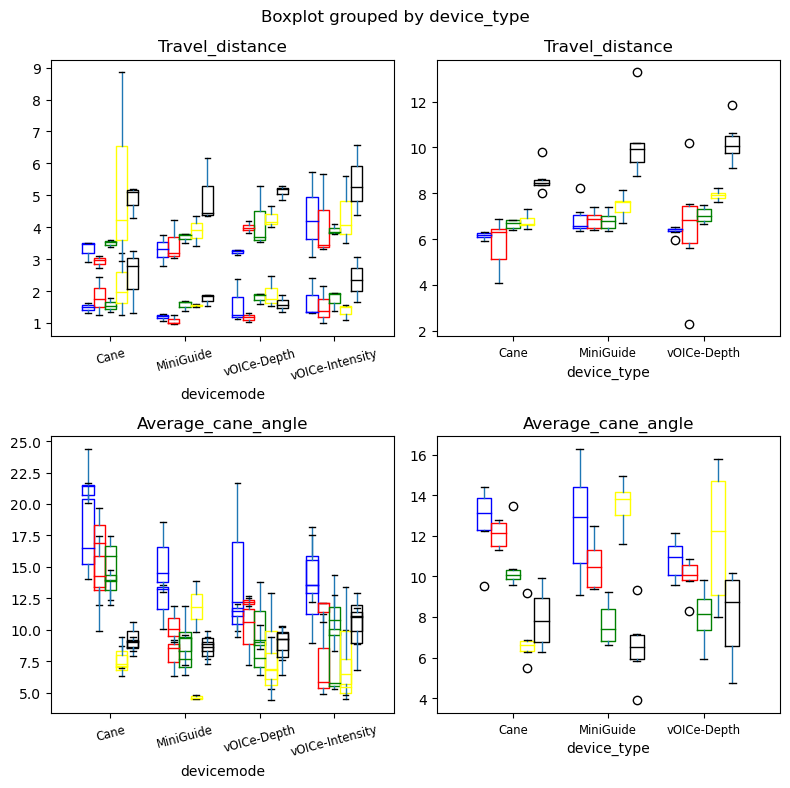

In [43]:
# Accuracy plots 
fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].set_title('Travel distance locate')
axs[0,1].set_title('Travel distance avoid')
axs[1,0].set_title('Cane angle locate')
axs[1,1].set_title('Cane angle avoid')

# Modify the xtick font size for every subplot
xtick_font_size = 'small'

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=xtick_font_size)

for Participants_id in Participants_list:
    
    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = results.sort_index(ascending=True)
    random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
    random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = pd.concat([random, results], axis=1)
    results['Contact_Response_time'] = results.Contact_time - results.Response_time
    results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    
    
    results_avoid = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")
    results_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = results_avoid.sort_index(ascending=True)
    random_avoid = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
    random_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = pd.concat([random_avoid, results_avoid], axis=1)
    results_avoid['Average_cane_angle'] = results_avoid['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    
    
    # Set position of bar on X axis
    Participants_id_index = Participants_list.index(Participants_id)
    c = c_list[Participants_id_index]
    position = br_list[Participants_id_index]
        
    # how to customize the display different elements:
    boxprops = dict(linestyle='-', linewidth=1, color=c)
    medianprops = dict(linestyle='-', linewidth=1, color=c)
    
    # Split response and contact time in near and far distance 
    results_near = results.loc[results['location'] <= 3]
    results_far = results.loc[results['location'] > 3]
    
    results_near.boxplot(column=['Travel_distance'],by='devicemode', positions=position, ax = axs[0,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results_far.boxplot(column=['Travel_distance'],by='devicemode', positions=position, ax = axs[0,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results_avoid.boxplot(column=['Travel_distance'],by='device_type', positions=position[0:3], ax = axs[0,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)  
    results_near.boxplot(column=['Average_cane_angle'],by='devicemode', positions=position, ax = axs[1,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results_far.boxplot(column=['Average_cane_angle'],by='devicemode', positions=position, ax = axs[1,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results_avoid.boxplot(column=['Average_cane_angle'],by='device_type', positions=position[0:3], ax = axs[1,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    
    axs[0,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[0,1].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)
    axs[1,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[1,1].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)
    
#     results.plot(kind='scatter', x='devicemode', y='Travel_distance', ax = axs[0,0],c = c)
#     results_avoid.plot(kind='scatter', x='device_type', y='Travel_distance', ax = axs[0,1],c = c)
#     results.plot(kind='scatter', x='devicemode', y='Average_cane_angle', ax = axs[1,0],c = c)
#     results_avoid.plot(kind='scatter', x='device_type', y='Average_cane_angle', ax = axs[1,1],c = c)
    
plt.tight_layout() 
    

In [ ]:
# Cane angle plots

plt.plot([sublist[1] for sublist in results_avoid.CaneAngle[5]])
np.mean(abs(np.array([sublist[1] for sublist in results_avoid.CaneAngle[5]])))
results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))

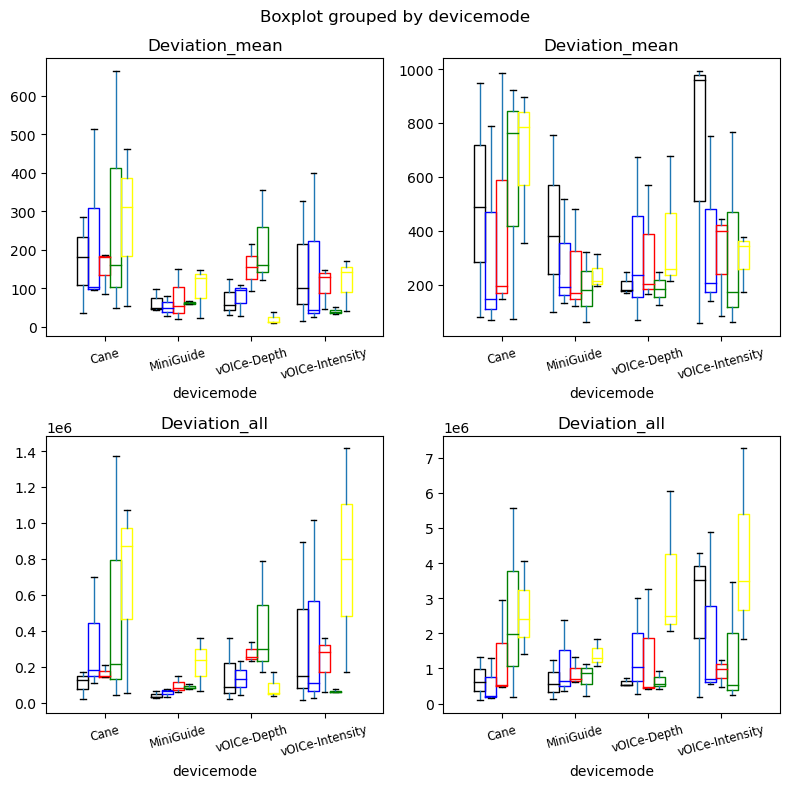

In [66]:
# Accuracy plots 

fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].set_title('Deviation locate near')

# Modify the xtick font size for every subplot
xtick_font_size = 'small'

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=xtick_font_size)

for Participants_id in Participants_list:
    
    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = results.sort_index(ascending=True)
    random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
    random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = pd.concat([random, results], axis=1)
    results['Contact_Response_time'] = results.Contact_time - results.Response_time
    results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results['Deviation_mean'] = results['Deviation'].apply(lambda x: np.mean(x))
    results['Deviation_all'] = results['Deviation'].apply(lambda x: sum(x))
    
    results_avoid = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")
    results_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = results_avoid.sort_index(ascending=True)
    random_avoid = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
    random_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = pd.concat([random_avoid, results_avoid], axis=1)
    results_avoid['Average_cane_angle'] = results_avoid['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    
    
    # Set position of bar on X axis
    Participants_id_index = Participants_list.index(Participants_id)
    c = c_list[Participants_id_index]
    position = br_list[Participants_id_index]
        
    # Split response and contact time in near and far distance 
    results_near = results.loc[results['location'] <= 3]
    results_far = results.loc[results['location'] > 3]    
    results_near.boxplot(column=['Deviation_mean'],by='devicemode', positions=position, ax = axs[0,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results_far.boxplot(column=['Deviation_mean'],by='devicemode', positions=position, ax = axs[0,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)     
    results_near.boxplot(column=['Deviation_all'],by='devicemode', positions=position, ax = axs[1,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)
    results_far.boxplot(column=['Deviation_all'],by='devicemode', positions=position, ax = axs[1,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)
    
    # how to customize the display different elements:
    boxprops = dict(linestyle='-', linewidth=1, color=c)
    medianprops = dict(linestyle='-', linewidth=1, color=c)
     
#     results.boxplot(column=['Deviation_mean'],by='devicemode', positions=position, ax = axs[1,0],grid=False,boxprops=boxprops,\
#                     medianprops=medianprops, widths = barWidth)    
    
    axs[0,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[0,1].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[1,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[1,1].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    
plt.tight_layout() 

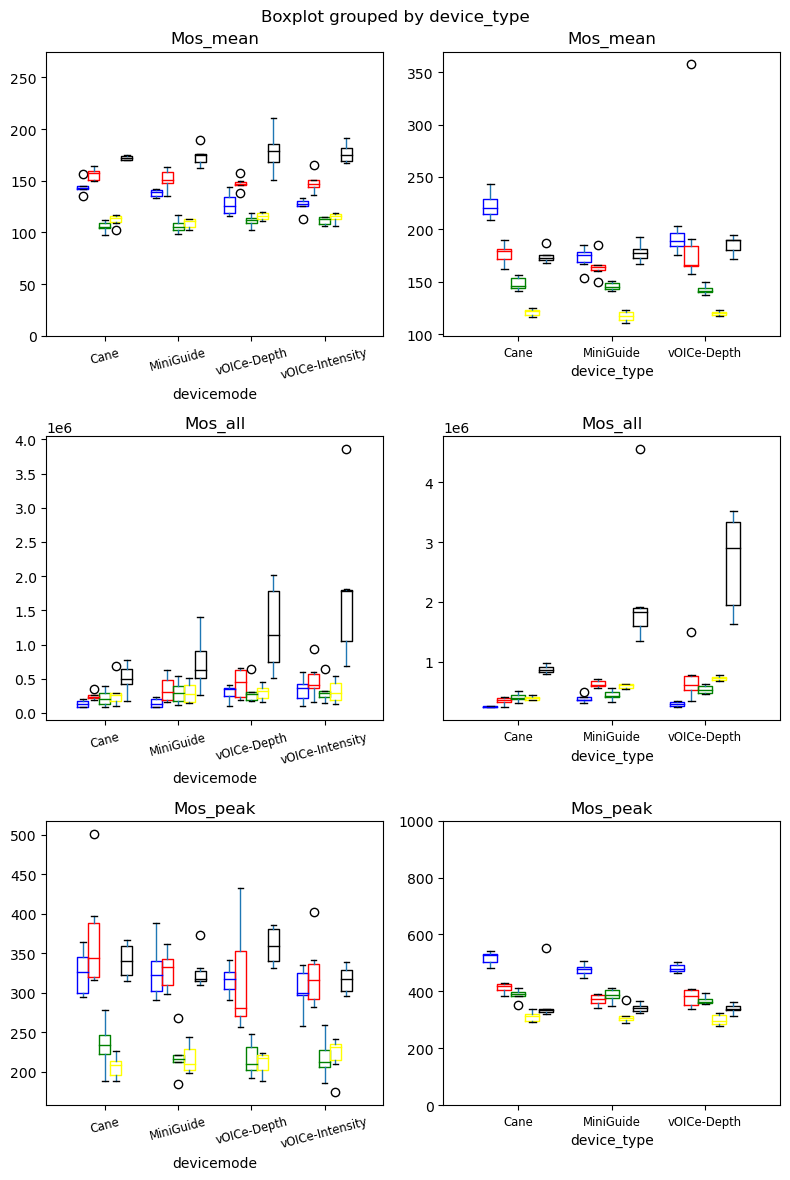

In [79]:
# Stability plots 

fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].set_title('Margin stability locate')
axs[0,1].set_title('Margin stability avoid')

# Set y limits for every subplot
y_limit = (0, 275)

for ax in axs.flat[0:1]:
    ax.set_ylim(y_limit)

    
# Modify the xtick font size for every subplot
xtick_font_size = 'small'

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=xtick_font_size)

for Participants_id in Participants_list:
    
    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = results.sort_index(ascending=True)
    random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
    random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = pd.concat([random, results], axis=1)
    results['Contact_Response_time'] = results.Contact_time - results.Response_time
    results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results['Deviation_mean'] = results['Deviation'].apply(lambda x: np.mean(x))
    results['Mos_mean'] = results['Margin_stability_all'].apply(lambda x: np.mean(x))
    results['Mos_all'] = results['Margin_stability_all'].apply(lambda x: sum(x))
    results['Mos_peak'] = results['Margin_stability_all'].apply(lambda x: max(x))
    
    results_avoid = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")
    results_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = results_avoid.sort_index(ascending=True)
    random_avoid = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
    random_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = pd.concat([random_avoid, results_avoid], axis=1)
    results_avoid['Average_cane_angle'] = results_avoid['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results_avoid['Mos_mean'] = results_avoid['Margin_stability_all'].apply(lambda x: np.mean(x))
    results_avoid['Mos_all'] = results_avoid['Margin_stability_all'].apply(lambda x: sum(x))
    results_avoid['Mos_peak'] = results_avoid['Margin_stability_all'].apply(lambda x: max(x))
    
    # Set position of bar on X axis
    Participants_id_index = Participants_list.index(Participants_id)
    c = c_list[Participants_id_index]
    position = br_list[Participants_id_index]
        
    # Split response and contact time in near and far distance 
    results_near = results.loc[results['location'] <= 3]
    results_far = results.loc[results['location'] > 3] 
    
    # how to customize the display different elements:
    boxprops = dict(linestyle='-', linewidth=1, color=c)
    medianprops = dict(linestyle='-', linewidth=1, color=c)
    
    results.boxplot(column=['Mos_mean'],by='devicemode', positions=position, ax = axs[0,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results.boxplot(column=['Mos_all'],by='devicemode', positions=position, ax = axs[1,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)
    results_avoid.boxplot(column=['Mos_mean'],by='device_type',  positions=position[0:3], ax = axs[0,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results_avoid.boxplot(column=['Mos_all'],by='device_type',  positions=position[0:3], ax = axs[1,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results.boxplot(column=['Mos_peak'],by='devicemode', positions=position, ax = axs[2,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    results_avoid.boxplot(column=['Mos_peak'],by='device_type',  positions=position[0:3], ax = axs[2,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth) 
    
    
    axs[0,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[0,1].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)
    axs[1,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[1,1].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)
    axs[2,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[2,1].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)
    axs[2,1].set_ylim([0,1000])
    
#     results.plot(kind='scatter', x='devicemode', y='Mos_mean', ax = axs[0],c = c)
#     results_avoid.plot(kind='scatter', x='device_type', y='Mos_mean', ax = axs[1],c = c)
    
plt.tight_layout() 

In [30]:
# Stability example plots 

Participants_id = "P1"
folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")
results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
results = results.sort_index(ascending=True)
random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
results = pd.concat([random, results], axis=1)
results['Contact_Response_time'] = results.Contact_time - results.Response_time
results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
results['Deviation_mean'] = results['Deviation'].apply(lambda x: np.mean(x))
results['Mos_mean'] = results['Margin_stability_all'].apply(lambda x: np.mean(x))


t = results.COFM_absvel[1]
t
np.array([item for sublist in t for item in sublist]).reshape(-1, 3)[:,2]

array([0.        , 0.        , 0.02197709, ..., 0.2334995 , 0.        ,
       0.        ])

In [39]:
from Process import *
config_filepath = 'None' #file_list_yml[0]
# marker_filepath = r'E:\data\pilot_results\Low vision study_SS2303\Low Vision (1)\Pilot\Processed\locate01.c3d'
marker_filepath = r'E:\data\test_results\P7\Session_preprocessed\Locate2.c3d'
recording_filepath = 'None' #file_list[0]

[]

In [53]:
results['vel_data'] = results['COFM_absvel'].apply(lambda x: self.velocity(np.array([item for sublist in x for item in sublist]).reshape(-1, 3)))

results['hesitation_segments'] = results['vel_data'].apply(lambda x: sum(len(sublist) for sublist in self.hesitations(x[0])[1]))


results['hesitation_segments']


1        0
2      164
3        0
4      391
5     1819
6      738
7      396
8      158
9     1695
10     365
11     502
12    2047
13    2267
14     128
15    1713
16    1014
17       0
18    1571
19     256
20       0
21     255
22       0
23    1316
24    1478
Name: hesitation_segments, dtype: int64

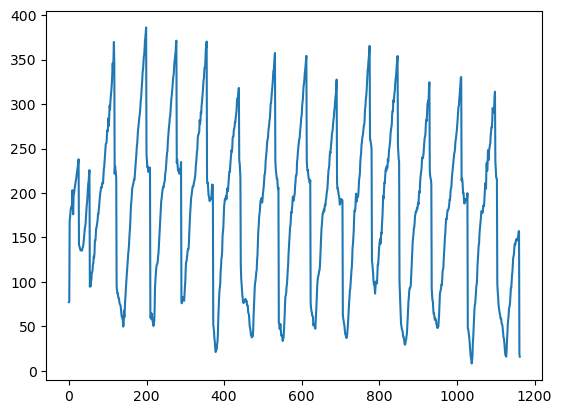

In [25]:
Participants_id = "P5"
folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
results = pd.read_json(os.path.join(folder_path,'results_walk.json'),orient="split")
results.index = [1,2]
results = results.sort_index(ascending=True)

plt.plot(results['Margin_stability_all'][2])

In [26]:
results

,Response_time,Contact_time,Average_velocity,Max_velocity,Margin_stability,Margin_stability_all,Travel_distance,Cane_left,Cane_right,Cane_avgvel,...,lmmal,lmt5,lmt23,lmt1,rheel,rlmal,rmmal,rmt5,rmt23,rmt1
1,0,13.175000,0.424622,0.802528,96.501302,"[114.2808110942, 113.6263101052, 106.364518007...",5.630168,0.011114,-5.451241,1.064345,...,"[[-2791.3310546875, 1147.7736816406, 105.28929...","[[-2755.8149414062, 1292.8681640625, 39.884269...","[[-2713.6135253906, 1271.8754882812, 53.541412...","[[-2684.8098144531, 1220.4111328125, 44.881286...","[[-2863.837890625, 1055.771484375, 48.03020858...","[[-2801.7724609375, 992.3386230469, 82.9250183...","[[-2795.6887207031, 1085.2003173828, 105.79293...","[[-2691.6926269531, 972.3820800781, 42.0587844...","[[-2648.5227050781, 1017.6658935547, 54.298645...","[[-2653.80078125, 1068.7849121094, 48.55340957..."
2,0,9.691667,0.648720,0.854440,77.321682,"[77.3216815857, 78.8497521463, 168.2229226232,...",6.326068,6.222443,-1.687480,2.772143,...,"[[3674.5166015625, 1040.3126220703, 90.9256896...","[[3666.4140625, 890.878112793, 23.805814743], ...","[[3619.4243164062, 903.8667602539, 38.98991012...","[[3580.9895019531, 950.4616699219, 28.40802764...","[[3848.0297851562, 1264.5373535156, 151.518554...","[[3763.2185058594, 1297.3972167969, 155.348556...","[[3779.6142578125, 1205.2297363281, 160.501480...","[[3695.6865234375, 1285.1638183594, 51.7715492...","[[3671.197265625, 1232.0411376953, 47.07862854...","[[3694.8117675781, 1193.0589599609, 44.2922248..."


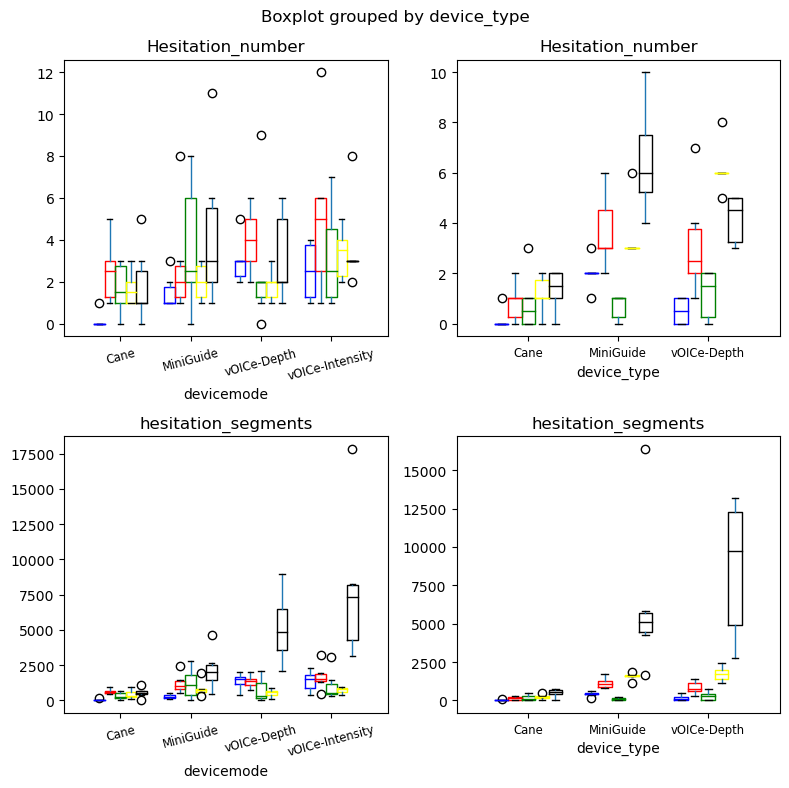

In [62]:
# Fluency/Smoothness plots 

"""REMOVE the heistation phase from the start and the end"""

fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].set_title('Heisitation number locate')
axs[0,1].set_title('Heisitation number avoid')

# Modify the xtick font size for every subplot
xtick_font_size = 'small'

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=xtick_font_size)

for Participants_id in Participants_list:
    
    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = results.sort_index(ascending=True)
    random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
    random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = pd.concat([random, results], axis=1)
    results['Contact_Response_time'] = results.Contact_time - results.Response_time
    results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results['Deviation_mean'] = results['Deviation'].apply(lambda x: np.mean(x))
    results['Mos_mean'] = results['Margin_stability_all'].apply(lambda x: np.mean(x))
    results['vel_data'] = results['COFM_absvel'].apply(lambda x: self.velocity(np.array([item for sublist in x for item in sublist]).reshape(-1, 3)))
    results['hesitation_segments'] = results['vel_data'].apply(lambda x: sum(len(sublist) for sublist in self.hesitations(x[0])[1]))
    
    
    results_avoid = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")
    results_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = results_avoid.sort_index(ascending=True)
    random_avoid = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
    random_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = pd.concat([random_avoid, results_avoid], axis=1)
    results_avoid['Average_cane_angle'] = results_avoid['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results_avoid['Mos_mean'] = results_avoid['Margin_stability_all'].apply(lambda x: np.mean(x))
    results_avoid['vel_data'] = results_avoid['COFM_absvel'].apply(lambda x: self.velocity(np.array([item for sublist in x for item in sublist]).reshape(-1, 3)))
    results_avoid['hesitation_segments'] = results_avoid['vel_data'].apply(lambda x: sum(len(sublist) for sublist in self.hesitations(x[0])[1]))
    
    
    # Set position of bar on X axis
    Participants_id_index = Participants_list.index(Participants_id)
    c = c_list[Participants_id_index]
    position = br_list[Participants_id_index]
    
    # how to customize the display different elements:
    boxprops = dict(linestyle='-', linewidth=1, color=c)
    medianprops = dict(linestyle='-', linewidth=1, color=c)
    
    results.boxplot(column=['Hesitation_number'],by='devicemode', positions=position, ax = axs[0,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)      
    results.boxplot(column=['hesitation_segments'],by='devicemode', positions=position, ax = axs[1,0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)    
        
    results_avoid.boxplot(column=['Hesitation_number'],by='device_type',  positions=position[0:3], ax = axs[0,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)    
    results_avoid.boxplot(column=['hesitation_segments'],by='device_type',  positions=position[0:3], ax = axs[1,1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)  

    axs[0,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[0,1].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)
    axs[1,0].set_xticks(x_tick_loc_locate, locate_xtick, rotation = 15)
    axs[1,1].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)    
    
#     results.plot(kind='scatter', x='devicemode', y='Hesitation_number', ax = axs[0],c = c)
#     results_avoid.plot(kind='scatter', x='device_type', y='Hesitation_number', ax = axs[1],c = c)
    
plt.tight_layout()     
    

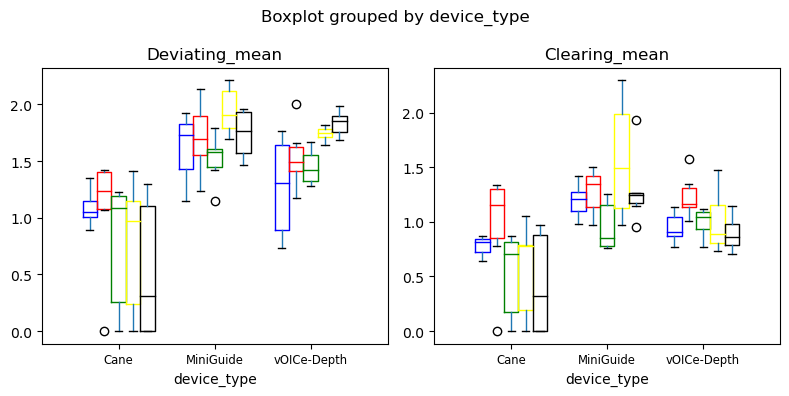

In [48]:
# Effective plots 

fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].set_title('Deviation distance avoid')
axs[1].set_title('Clearing distance avoid')

# Modify the xtick font size for every subplot
xtick_font_size = 'small'

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=xtick_font_size)

for Participants_id in Participants_list:
    
    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = results.sort_index(ascending=True)
    random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
    random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = pd.concat([random, results], axis=1)
    results['Contact_Response_time'] = results.Contact_time - results.Response_time
    results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results['Deviation_mean'] = results['Deviation'].apply(lambda x: np.mean(x))
    results['Mos_mean'] = results['Margin_stability_all'].apply(lambda x: np.mean(x))
    
    results_avoid = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")
    results_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = results_avoid.sort_index(ascending=True)
    random_avoid = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
    random_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = pd.concat([random_avoid, results_avoid], axis=1)
    results_avoid['Average_cane_angle'] = results_avoid['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results_avoid['Mos_mean'] = results_avoid['Margin_stability_all'].apply(lambda x: np.mean(x))
    results_avoid['Deviating_mean'] = results_avoid['Deviating_distance'].apply(lambda x: np.mean(x))
    results_avoid['Clearing_mean'] = results_avoid['Clearing_distance'].apply(lambda x: np.mean(x))
    
    # Set position of bar on X axis
    Participants_id_index = Participants_list.index(Participants_id)
    c = c_list[Participants_id_index]
    position = br_list[Participants_id_index]
    
    # how to customize the display different elements:
    boxprops = dict(linestyle='-', linewidth=1, color=c)
    medianprops = dict(linestyle='-', linewidth=1, color=c)
    
    results_avoid.boxplot(column=['Deviating_mean'],by='device_type', positions=position[0:3], ax = axs[0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)    
        
    results_avoid.boxplot(column=['Clearing_mean'],by='device_type', positions=position[0:3], ax = axs[1],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)     
    
    axs[0].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)
    axs[1].set_xticks(x_tick_loc_avoid, avoid_xtick, rotation = 0)
    
#     results.plot(kind='scatter', x='devicemode', y='Hesitation_number', ax = axs[0],c = c)
#     results_avoid.plot(kind='scatter', x='device_type', y='Hesitation_number', ax = axs[1],c = c)
    
plt.tight_layout()     


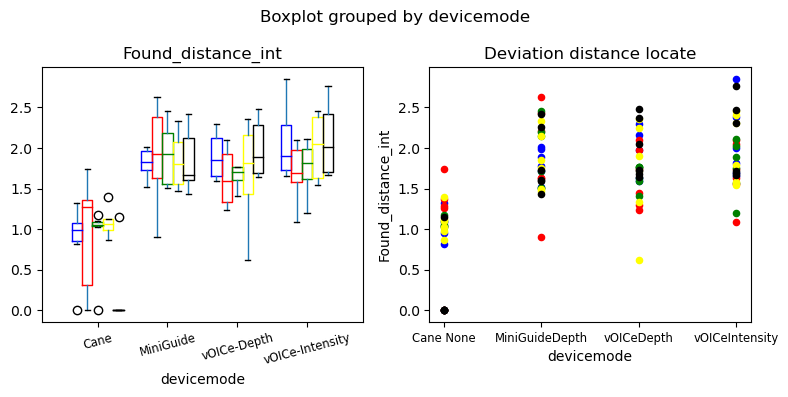

In [49]:
# Effective plots - found distance 

fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].set_title('Deviation distance locate')
axs[1].set_title('Deviation distance locate')

# Modify the xtick font size for every subplot
xtick_font_size = 'small'

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=xtick_font_size)

for Participants_id in Participants_list:
    
    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = results.sort_index(ascending=True)
    random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
    random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = pd.concat([random, results], axis=1)
    results['Contact_Response_time'] = results.Contact_time - results.Response_time
    results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results['Deviation_mean'] = results['Deviation'].apply(lambda x: np.mean(x))
    results['Mos_mean'] = results['Margin_stability_all'].apply(lambda x: np.mean(x))
    results['Found_distance_int'] = results['Found_distance'].apply(lambda x: np.array(x))
    
    results_avoid = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")
    results_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = results_avoid.sort_index(ascending=True)
    random_avoid = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
    random_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = pd.concat([random_avoid, results_avoid], axis=1)
    results_avoid['Average_cane_angle'] = results_avoid['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results_avoid['Mos_mean'] = results_avoid['Margin_stability_all'].apply(lambda x: np.mean(x))
    results_avoid['Deviating_mean'] = results_avoid['Deviating_distance'].apply(lambda x: np.mean(x))
    results_avoid['Clearing_mean'] = results_avoid['Clearing_distance'].apply(lambda x: np.mean(x))
    
    
    # Set position of bar on X axis
    Participants_id_index = Participants_list.index(Participants_id)
    c = c_list[Participants_id_index]
    position = br_list[Participants_id_index]
    
    # how to customize the display different elements:
    boxprops = dict(linestyle='-', linewidth=1, color=c)
    medianprops = dict(linestyle='-', linewidth=1, color=c)
    
    results.boxplot(column=['Found_distance_int'],by='devicemode', positions=position, ax = axs[0],grid=False,boxprops=boxprops,\
                    medianprops=medianprops, widths = barWidth)  
        
    results.plot(kind='scatter', x='devicemode', y='Found_distance_int', ax = axs[1],c = c)
    
    axs[0].set_xticks(x_tick_loc_locate,
            ['Cane','MiniGuide','vOICe-Depth','vOICe-Intensity'], rotation = 15)
#     results_avoid.plot(kind='scatter', x='device_type', y='Hesitation_number', ax = axs[1],c = c)
    
plt.tight_layout()     

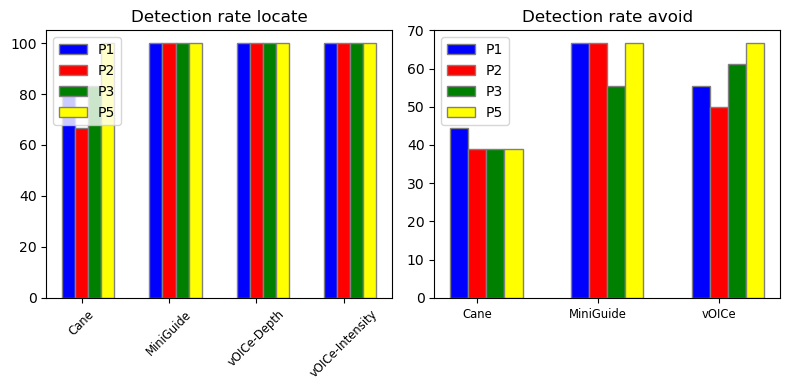

In [57]:
# Effective plots - detection rate 
Participants_list = ['P1','P2','P3','P5']
fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].set_title('Detection rate locate')
axs[1].set_title('Detection rate avoid')

# Modify the xtick font size for every subplot
xtick_font_size = 'small'

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=xtick_font_size)

for Participants_id in Participants_list:
    
    folder_path = os.path.join(r'E:\data\test_results', Participants_id ,'Session_preprocessed')
    results = pd.read_json(os.path.join(folder_path,'results_locate.json'),orient="split")
    results.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = results.sort_index(ascending=True)
    random = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet9')
    random.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    results = pd.concat([random, results], axis=1)
    results['Contact_Response_time'] = results.Contact_time - results.Response_time
    results['Average_cane_angle'] = results['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results['Deviation_mean'] = results['Deviation'].apply(lambda x: np.mean(x))
    results['Mos_mean'] = results['Margin_stability_all'].apply(lambda x: np.mean(x))
    results['Detection_index'] = results['Response_time'].apply(lambda x: 0 if x==0 else 1)
    detection_rate = results.groupby('devicemode')['Detection_index'].value_counts(normalize=True) * 100

    results_avoid = pd.read_json(os.path.join(folder_path,'results_avoid.json'),orient="split")
    results_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = results_avoid.sort_index(ascending=True)
    random_avoid = pd.read_excel(r'E:\data\test_results\Face task full randomisation.xlsx',sheet_name='Sheet7')
    random_avoid.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
    results_avoid = pd.concat([random_avoid, results_avoid], axis=1)
    results_avoid['Average_cane_angle'] = results_avoid['CaneAngle'].apply(lambda x: np.mean(abs(np.array([sublist[1] for sublist in x]))))
    results_avoid['Mos_mean'] = results_avoid['Margin_stability_all'].apply(lambda x: np.mean(x))
    results_avoid['Deviating_mean'] = results_avoid['Deviating_distance'].apply(lambda x: np.mean(x))
    results_avoid['Clearing_mean'] = results_avoid['Clearing_distance'].apply(lambda x: np.mean(x))

    results_avoid['Detection_index'] = results_avoid['Deviating_distance'].apply(lambda x: 0 if x== 0 else len(x))
    results_avoid['Detection_rate'] = results_avoid['Detection_index'].apply(lambda x: 0 if x== 0 else x/3)
    detection_rate_avoid = results_avoid.groupby('device_type')['Detection_rate'].transform('mean')
    detection_rate_avoid = detection_rate_avoid*100

    # Draw the bar plot locate   
    x_locate = ['Cane','MiniGuide','vOICe-Depth','vOICe-Intensity']
    y_locate = [detection_rate['Cane None'][1],detection_rate['MiniGuideDepth'][1],\
                detection_rate['vOICeDepth'][1],detection_rate['vOICeIntensity'][1]]    
    x_avoid = ['Cane', 'MiniGuide', 'vOICe']
    y_avoid = [detection_rate_avoid[2],detection_rate_avoid[1],detection_rate_avoid[5]]
    
    # Set position of bar on X axis
    barWidth = 0.15
    br1 = np.arange(len(y_locate))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]
    
    br1_a = np.arange(len(y_avoid))
    br2_a = [x + barWidth for x in br1_a]
    br3_a = [x + barWidth for x in br2_a]
    br4_a = [x + barWidth for x in br3_a]

    if Participants_id == 'P1':
        c = 'blue'
        axs[0].bar(br1,y_locate, color =c, width = barWidth,edgecolor ='grey', label ='P1')
        axs[1].bar(br1_a,y_avoid, color =c, width = barWidth,edgecolor ='grey', label ='P1')
        
    elif Participants_id == 'P2':
        c = 'red'
        axs[0].bar(br2,y_locate, color =c, width = barWidth,edgecolor ='grey', label ='P2')
        axs[1].bar(br2_a,y_avoid, color =c, width = barWidth,edgecolor ='grey', label ='P2')
        
    elif Participants_id == 'P3':
        c = 'green'
        axs[0].bar(br3,y_locate, color =c, width = barWidth,edgecolor ='grey', label ='P3')
        axs[1].bar(br3_a,y_avoid, color =c, width = barWidth,edgecolor ='grey', label ='P3')
        
    elif Participants_id == 'P5':
        c = 'yellow'
        axs[0].bar(br4,y_locate, color =c, width = barWidth,edgecolor ='grey', label ='P5')
        axs[1].bar(br4_a,y_avoid, color =c, width = barWidth,edgecolor ='grey', label ='P5')
        

    # Adding Xticks
    axs[0].set_xticks([r + barWidth for r in range(len(y_locate))],
            ['Cane','MiniGuide','vOICe-Depth','vOICe-Intensity'], rotation = 45)
    
    axs[1].set_xticks([r + barWidth for r in range(len(y_avoid))],
            ['Cane', 'MiniGuide', 'vOICe'])
    axs[0].legend()
    axs[1].legend()
    
#     # how to customize the display different elements:
#     boxprops = dict(linestyle='-', linewidth=1, color=c)
#     medianprops = dict(linestyle='-', linewidth=1, color=c)
    
#     results_avoid.boxplot(column=['Deviating_mean'],by='device_type', ax = axs[0],grid=False,boxprops=boxprops,\
#                     medianprops=medianprops)  
        
#     results_avoid.boxplot(column=['Clearing_mean'],by='device_type', ax = axs[1],grid=False,boxprops=boxprops,\
#                     medianprops=medianprops)   
#     results.plot(kind='scatter', x='devicemode', y='Hesitation_number', ax = axs[0],c = c)
#     results_avoid.plot(kind='scatter', x='device_type', y='Hesitation_number', ax = axs[1],c = c)
    
plt.tight_layout()     


In [ ]:
# Example plots for veering distance

import math
# Accuracy plots
fig, axs = plt.subplots(1,1,figsize=(8,8))
# Set x and y limits for every subplot
x_limit = (-3000, 3000)
y_limit = (-2500, 3500)
axs.set_xlim(x_limit)
axs.set_ylim(y_limit)

index = 1
axs.plot([sublist[0] for sublist in results.COFM[index]],[sublist[1] for sublist in results.COFM[index]])
axs.scatter(results.CYL_center[index][100][0],results.CYL_center[index][100][1],marker='+',c = 'r')
draw_pointer_line( [results.COFM[index][0][0],results.COFM[index][0][1]],\
                  [results.CYL_center[index][100][0],results.CYL_center[index][100][1]])

# point_line_distance([results.COFM[index][1000][0],results.COFM[index][1000][1]], [results.COFM[index][0][0],results.COFM[index][0][1]],\
#                     [results.CYL_center[index][100][0],results.CYL_center[index][100][1]])

results['Deviation'] = results.apply(lambda row: point_line_distance(row), axis = 1)

In [ ]:
# Example plots for the cane width vs time 

plt.plot(self.cane_angel[self.trial_start_frame:self.trial_end_frame,1])
# Assume we have a moving slider witdth at 100 frames and calculate within the 100 frames, we get a max and min value \
# the different between min and max across the windows will be change of our width 

slide_width = 500 
cane_angle = self.cane_angel[self.trial_start_frame:self.trial_end_frame,1]
cane_angle_diff = []

for index in range(0, len(cane_angle)-slide_width):
    
    cane_angle_window = cane_angle[index:(index+slide_width)]
    
    cane_angle_diff.append(max(cane_angle_window)-min(cane_angle_window))


plt.plot(cane_angle_diff)


In [ ]:
# Summary plot for COM 
# print(results)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
%matplotlib inline

# Animate a single trajectory
# pick_traj = 5      # Select a trajectory to simulate
traj_X = self.com[:,0]
traj_Y = self.com[:,1]

# Get velocity as traj_XV
traj_XV = np.linspace(0,len(self.com_absvel)-1,len(self.com_absvel))
sos = signal.butter(50, 35, 'lp', fs=1000, output='sos')
traj_YV = signal.sosfiltfilt(sos, self.com_absvel)

# Set up the graph using Matplotlib
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,12),gridspec_kw={'height_ratios': [2, 1]})
ax1.set(xlim=(-3000, 3000), ylim=(-2500, 3500))
ax1.set_ylabel('mm', fontsize=15)
ax1.set_xlabel('mm', fontsize=15)
# ax1.get_xaxis().set_label_coords(0.5, 0.12)

# Set up a subplot for abslute velocity 
ax2.set(xlim=(0,len(self.com_absvel)))
ax2.set_title('Absolute Velocity', fontsize=15)
ax2.set_ylabel('m/s', fontsize=15)
ax2.set_xlabel('Frame Number', fontsize=15)

# Set up the hesitations
hesitations, segments = self.hesitations(self.get_marker('COFMAbsoluteVel')[:,2])
segmentsall = np.hstack(segments)

# Initiate camera
camera = Camera(fig)

# Create individual frames
for j in range(self.trial_start_frame+1,self.trial_end_frame,10): 
        
    # Projectile's trajectory
    x = traj_X[self.trial_start_frame:j]
    y = traj_Y[self.trial_start_frame:j]
    
    # Plot velocity
    xv = traj_XV[self.trial_start_frame:j]
    yv = traj_YV[self.trial_start_frame:j]
    
    # Plot the target 
    ax1.scatter(self.target_1[:,0],self.target_1[:,1],marker='+',c = 'r')
    ax1.scatter(self.target_2[:,0],self.target_2[:,1],marker='+',c = 'r')
    ax1.scatter(self.target_3[:,0],self.target_3[:,1],marker='+',c = 'r')
    
    # Plot indicater of start, touch and end frame with response and contact time
    ax2.axvline(x=self.trial_start_frame, color = 'red', linestyle = 'dashed', label= 'Start Frame')
    ax2.axvline(x=self.trial_end_frame, color = 'red', linestyle = 'dashed', label= 'End Frame')
#     ax2.axvline(x=self.trial_found_frame, color = 'red', linestyle = 'dashed', label= 'found Frame')
    ax2.axhline(y= 0.1, color = 'gray', linestyle = 'dashed')
    
    """ Add legend for different assistant line: Start of trial; Obstacle found; Trial ended"""
    
#     text =  "Start Frame:" + str(self.trial_start_frame) + "\nEnd Frame: " + str(self.trial_end_frame) \
#     + "\nResponse Time: " + str(self.response_time()) + "\nContact Time: " + str(self.contact_time()) \
#     + "\nMax Velocity: " + str(max_vel) + "\nHeistation Number: " + str(len(hesitations)) \
#     + "\nTravel Distance: " + str(self.travel_distance(self.com[self.trial_start_frame:self.trial_end_frame,:]))
    
#     ax1.text(2200,3100, text, fontsize=12, ha='center', va='bottom')

    if j in segmentsall:
        # Show Projectile's location
        ax1.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')

        # Show Projectile's trajectory
        ax1.plot(x, y, color='b', lw=2, linestyle='--')

        # Show Projectile's location
        ax2.plot(xv[-1], yv[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')

        # Show Projectile's trajectory
        ax2.plot(xv, yv, color='b', lw=2, linestyle='--')
        
        
    else:
        # Show Projectile's location
        ax1.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='g', markerfacecolor='g')

        # Show Projectile's trajectory
        ax1.plot(x, y, color='b', lw=2, linestyle='--')

        # Show Projectile's location
        ax2.plot(xv[-1], yv[-1], marker='o', markersize=12, markeredgecolor='g', markerfacecolor='g')

        # Show Projectile's trajectory
        ax2.plot(xv, yv, color='b', lw=2, linestyle='--')
    
    
    # Capture frame
    camera.snap()
    
    
# Create animation
anim = camera.animate(interval = 60, repeat = False, repeat_delay = 500)

# Inline display
HTML(anim.to_html5_video())



In [ ]:
# Summary plot for Cane

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
%matplotlib inline

# Animate a single trajectory
# pick_traj = 5      # Select a trajectory to simulate
self.cane = self.get_marker('CANEc')
traj_X = self.cane[:,0]
traj_Y = self.cane[:,1]

# Get velocity as traj_XV
traj_XV = np.linspace(0,len(self.com_absvel)-1,len(self.com_absvel))
sos = signal.butter(50, 35, 'lp', fs=1000, output='sos')
traj_YV = signal.sosfiltfilt(sos, self.get_marker('CANEsegAngVelDeg')[:,1])

# Set up the graph using Matplotlib
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,12),gridspec_kw={'height_ratios': [2, 1]})
ax1.set(xlim=(-3000, 3000), ylim=(-2500, 3500))
ax1.set_ylabel('mm', fontsize=15)
ax1.set_xlabel('mm', fontsize=15)
# ax1.get_xaxis().set_label_coords(0.5, 0.12)

# Set up a subplot for abslute velocity 
ax2.set(xlim=(0,len(self.com_absvel)))
ax2.set_title('Angular Velocity', fontsize=15)
ax2.set_ylabel('deg/s', fontsize=15)
ax2.set_xlabel('Frame Number', fontsize=15)

# Set up the hesitations
hesitations, segments = self.hesitations(self.get_marker('COFMAbsoluteVel')[:,2])
segmentsall = np.hstack(segments)

# Initiate camera
camera = Camera(fig)

# Create individual frames
for j in range(self.trial_start_frame+1,self.trial_end_frame,10): 
        
    # Projectile's trajectory
    x = traj_X[self.trial_start_frame:j]
    y = traj_Y[self.trial_start_frame:j]
    
    # Plot velocity
    xv = traj_XV[self.trial_start_frame:j]
    yv = traj_YV[self.trial_start_frame:j]
    
    # Plot the target 
    ax1.scatter(self.target_1[:,0],self.target_1[:,1],marker='+',c = 'r')
    ax1.scatter(self.target_2[:,0],self.target_2[:,1],marker='+',c = 'r')
    ax1.scatter(self.target_3[:,0],self.target_3[:,1],marker='+',c = 'r')
    
    # Plot indicater of start, touch and end frame with response and contact time
    ax2.axvline(x=self.trial_start_frame, color = 'red', linestyle = 'dashed', label= 'Start Frame')
    ax2.axvline(x=self.trial_end_frame, color = 'red', linestyle = 'dashed', label= 'End Frame')
#     ax2.axvline(x=self.trial_found_frame, color = 'red', linestyle = 'dashed', label= 'found Frame')
    
#     text =  "Start Frame:" + str(self.trial_start_frame) + "\nEnd Frame: " + str(self.trial_end_frame) \
#     + "\nResponse Time: " + str(self.response_time()) + "\nContact Time: " + str(self.contact_time()) \
#     + "\nMax Velocity: " + str(max_vel) + "\nHeistation Number: " + str(len(hesitations)) \
#     + "\nTravel Distance: " + str(self.travel_distance(self.com[self.trial_start_frame:self.trial_end_frame,:]))
    
#     ax1.text(2200,3100, text, fontsize=12, ha='center', va='bottom')

    if j in segmentsall:
        # Show Projectile's location
        ax1.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')

        # Show Projectile's trajectory
        ax1.plot(x, y, color='b', lw=2, linestyle='--')

        # Show Projectile's location
        ax2.plot(xv[-1], yv[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')

        # Show Projectile's trajectory
        ax2.plot(xv, yv, color='b', lw=2, linestyle='--')
        
        
    else:
        # Show Projectile's location
        ax1.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='g', markerfacecolor='g')

        # Show Projectile's trajectory
        ax1.plot(x, y, color='b', lw=2, linestyle='--')

        # Show Projectile's location
        ax2.plot(xv[-1], yv[-1], marker='o', markersize=12, markeredgecolor='g', markerfacecolor='g')

        # Show Projectile's trajectory
        ax2.plot(xv, yv, color='b', lw=2, linestyle='--')
    
    
    # Capture frame
    camera.snap()
    
    
# Create animation
anim = camera.animate(interval = 60, repeat = False, repeat_delay = 500)

# Inline display
HTML(anim.to_html5_video())


In [ ]:
# Summary plot for COM 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
%matplotlib inline

# Animate a single trajectory
# pick_traj = 5      # Select a trajectory to simulate
traj_X = self.com[:,0]
traj_Y = self.com[:,1]

# Get velocity as traj_XV
traj_XV = np.linspace(0,len(self.com_absvel)-1,len(self.com_absvel))
sos = signal.butter(50, 35, 'lp', fs=1000, output='sos')
traj_YV = signal.sosfiltfilt(sos, self.com_absvel)

# Set up the graph using Matplotlib
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,12),gridspec_kw={'height_ratios': [2, 1]})
ax1.set(xlim=(-3000, 3000), ylim=(-2500, 3500))
ax1.set_ylabel('mm', fontsize=15)
ax1.set_xlabel('mm', fontsize=15)
# ax1.get_xaxis().set_label_coords(0.5, 0.12)

# Set up a subplot for abslute velocity 
ax2.set(xlim=(0,len(self.com_absvel)))
ax2.set_title('Absolute Velocity', fontsize=15)
ax2.set_ylabel('m/s', fontsize=15)
ax2.set_xlabel('Frame Number', fontsize=15)

# Set up the hesitations
hesitations, segments = self.hesitations(self.get_marker('COFMAbsoluteVel')[:,2])
segmentsall = np.hstack(segments)

# Initiate camera
camera = Camera(fig)

# Create individual frames
for j in range(self.trial_start_frame+1,self.trial_end_frame,10): 
        
    # Projectile's trajectory
    x = traj_X[self.trial_start_frame:j]
    y = traj_Y[self.trial_start_frame:j]
    
    # Plot velocity
    xv = traj_XV[self.trial_start_frame:j]
    yv = traj_YV[self.trial_start_frame:j]
    
    # Plot the obstacles
    ax1.scatter(self.target_1[:,0],self.target_1[:,1],marker='+',c = 'r')
    ax1.scatter(self.target_2[:,0],self.target_2[:,1],marker='+',c = 'r')
    ax1.scatter(self.target_3[:,0],self.target_3[:,1],marker='+',c = 'r')
    
    ax1.scatter(self.get_marker('SMALL1')[:,0],self.get_marker('SMALL1')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('SMALL2')[:,0],self.get_marker('SMALL2')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('SMALL3')[:,0],self.get_marker('SMALL3')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('SMALL4')[:,0],self.get_marker('SMALL4')[:,1],marker='+',c = 'r')
    
    ax1.scatter(self.get_marker('LARGE1')[:,0],self.get_marker('LARGE1')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('LARGE2')[:,0],self.get_marker('LARGE2')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('LARGE3')[:,0],self.get_marker('LARGE3')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('LARGE4')[:,0],self.get_marker('LARGE4')[:,1],marker='+',c = 'r')
    
    # Plot indicater of found and clear frame
#     ax1.axvline(x = self.com[self.trial_found_frame,0], color = 'red', linestyle = 'dashed')
#     ax1.axvline(x = self.com[self.clearing_frames,0], color = 'red', linestyle = 'dashed')
    
    # Plot indicater of start, touch and end frame with response and contact time
    ax2.axvline(x=self.trial_start_frame, color = 'red', linestyle = 'dashed', label= 'Start Frame')
    ax2.axvline(x=self.trial_end_frame, color = 'red', linestyle = 'dashed', label= 'End Frame')
#     ax2.axvline(x=self.trial_found_frame, color = 'red', linestyle = 'dashed', label= 'found Frame')
    ax2.axhline(y = 0.1, color = 'gray', linestyle = 'dashed')
    
#     text =  "Start Frame:" + str(self.trial_start_frame) + "\nEnd Frame: " + str(self.trial_end_frame) \
#     + "\nResponse Time: " + str(self.response_time()) + "\nContact Time: " + str(self.contact_time()) \
#     + "\nMax Velocity: " + str(max_vel) + "\nHeistation Number: " + str(len(hesitations)) \
#     + "\nTravel Distance: " + str(self.travel_distance(self.com[self.trial_start_frame:self.trial_end_frame,:]))
    
#     ax1.text(2200,3100, text, fontsize=12, ha='center', va='bottom')

    if j in segmentsall:
        # Show Projectile's location
        ax1.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')

        # Show Projectile's trajectory
        ax1.plot(x, y, color='b', lw=2, linestyle='--')

        # Show Projectile's location
        ax2.plot(xv[-1], yv[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')

        # Show Projectile's trajectory
        ax2.plot(xv, yv, color='b', lw=2, linestyle='--')
        
        
    else:
        # Show Projectile's location
        ax1.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='g', markerfacecolor='g')

        # Show Projectile's trajectory
        ax1.plot(x, y, color='b', lw=2, linestyle='--')

        # Show Projectile's location
        ax2.plot(xv[-1], yv[-1], marker='o', markersize=12, markeredgecolor='g', markerfacecolor='g')

        # Show Projectile's trajectory
        ax2.plot(xv, yv, color='b', lw=2, linestyle='--')
    
    
    # Capture frame
    camera.snap()
    
    
# Create animation
anim = camera.animate(interval = 60, repeat = False, repeat_delay = 500)

# Inline display
HTML(anim.to_html5_video())


In [ ]:
# Summary plot for Cane

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
%matplotlib inline

# Animate a single trajectory
# pick_traj = 5      # Select a trajectory to simulate
self.cane = self.get_marker('CANEc')
traj_X = self.cane[:,0]
traj_Y = self.cane[:,1]

# Get velocity as traj_XV
traj_XV = np.linspace(0,len(self.com_absvel)-1,len(self.com_absvel))
sos = signal.butter(50, 35, 'lp', fs=1000, output='sos')
traj_YV = signal.sosfiltfilt(sos, self.get_marker('CANEsegAngVelDeg')[:,1])

# Set up the graph using Matplotlib
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,12),gridspec_kw={'height_ratios': [2, 1]})
ax1.set(xlim=(-3000, 3000), ylim=(-2500, 3500))
ax1.set_ylabel('mm', fontsize=15)
ax1.set_xlabel('mm', fontsize=15)
# ax1.get_xaxis().set_label_coords(0.5, 0.12)

# Set up a subplot for abslute velocity 
ax2.set(xlim=(0,len(self.com_absvel)))
ax2.set_title('Angular Velocity', fontsize=15)
ax2.set_ylabel('deg/s', fontsize=15)
ax2.set_xlabel('Frame Number', fontsize=15)

# Set up the hesitations
hesitations, segments = self.hesitations(self.get_marker('COFMAbsoluteVel')[:,2])
segmentsall = np.hstack(segments)

# Initiate camera
camera = Camera(fig)

# Create individual frames
for j in range(self.trial_start_frame+1,self.trial_end_frame,10): 
        
    # Projectile's trajectory
    x = traj_X[self.trial_start_frame:j]
    y = traj_Y[self.trial_start_frame:j]
    
    # Plot velocity
    xv = traj_XV[self.trial_start_frame:j]
    yv = traj_YV[self.trial_start_frame:j]
    
    # Plot the target 
    ax1.scatter(self.target_1[:,0],self.target_1[:,1],marker='+',c = 'r')
    ax1.scatter(self.target_2[:,0],self.target_2[:,1],marker='+',c = 'r')
    ax1.scatter(self.target_3[:,0],self.target_3[:,1],marker='+',c = 'r')
    
    ax1.scatter(self.get_marker('SMALL1')[:,0],self.get_marker('SMALL1')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('SMALL2')[:,0],self.get_marker('SMALL2')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('SMALL3')[:,0],self.get_marker('SMALL3')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('SMALL4')[:,0],self.get_marker('SMALL4')[:,1],marker='+',c = 'r')
    
    ax1.scatter(self.get_marker('LARGE1')[:,0],self.get_marker('LARGE1')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('LARGE2')[:,0],self.get_marker('LARGE2')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('LARGE3')[:,0],self.get_marker('LARGE3')[:,1],marker='+',c = 'r')
    ax1.scatter(self.get_marker('LARGE4')[:,0],self.get_marker('LARGE4')[:,1],marker='+',c = 'r')
    
    # Plot indicater of start, touch and end frame with response and contact time
    ax2.axvline(x=self.trial_start_frame, color = 'red', linestyle = 'dashed', label= 'Start Frame')
    ax2.axvline(x=self.trial_end_frame, color = 'red', linestyle = 'dashed', label= 'End Frame')
#     ax2.axvline(x=self.trial_found_frame, color = 'red', linestyle = 'dashed', label= 'found Frame')
    
#     text =  "Start Frame:" + str(self.trial_start_frame) + "\nEnd Frame: " + str(self.trial_end_frame) \
#     + "\nResponse Time: " + str(self.response_time()) + "\nContact Time: " + str(self.contact_time()) \
#     + "\nMax Velocity: " + str(max_vel) + "\nHeistation Number: " + str(len(hesitations)) \
#     + "\nTravel Distance: " + str(self.travel_distance(self.com[self.trial_start_frame:self.trial_end_frame,:]))
    
#     ax1.text(2200,3100, text, fontsize=12, ha='center', va='bottom')

    if j in segmentsall:
        # Show Projectile's location
        ax1.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')

        # Show Projectile's trajectory
        ax1.plot(x, y, color='b', lw=2, linestyle='--')

        # Show Projectile's location
        ax2.plot(xv[-1], yv[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')

        # Show Projectile's trajectory
        ax2.plot(xv, yv, color='b', lw=2, linestyle='--')
        
        
    else:
        # Show Projectile's location
        ax1.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='g', markerfacecolor='g')

        # Show Projectile's trajectory
        ax1.plot(x, y, color='b', lw=2, linestyle='--')

        # Show Projectile's location
        ax2.plot(xv[-1], yv[-1], marker='o', markersize=12, markeredgecolor='g', markerfacecolor='g')

        # Show Projectile's trajectory
        ax2.plot(xv, yv, color='b', lw=2, linestyle='--')
    
    
    # Capture frame
    camera.snap()
    
    
# Create animation
anim = camera.animate(interval = 60, repeat = False, repeat_delay = 500)

# Inline display
HTML(anim.to_html5_video())
